Arquivos disponíveis no diretório: ['Python_M10_support material.csv']
Arquivo carregado com sucesso!

Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inat

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


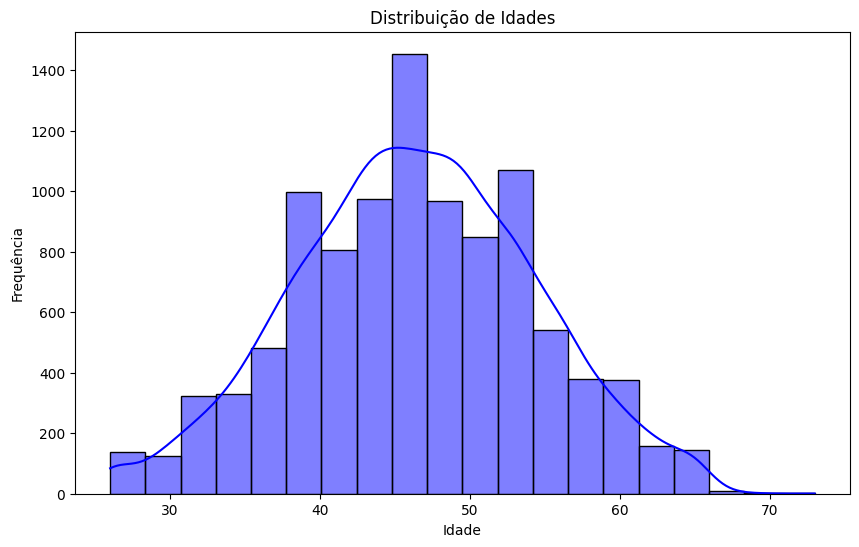

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


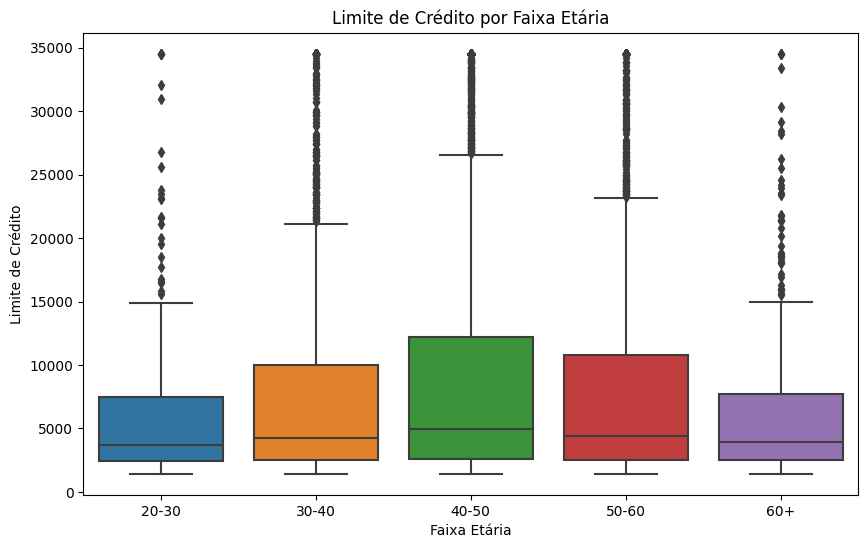

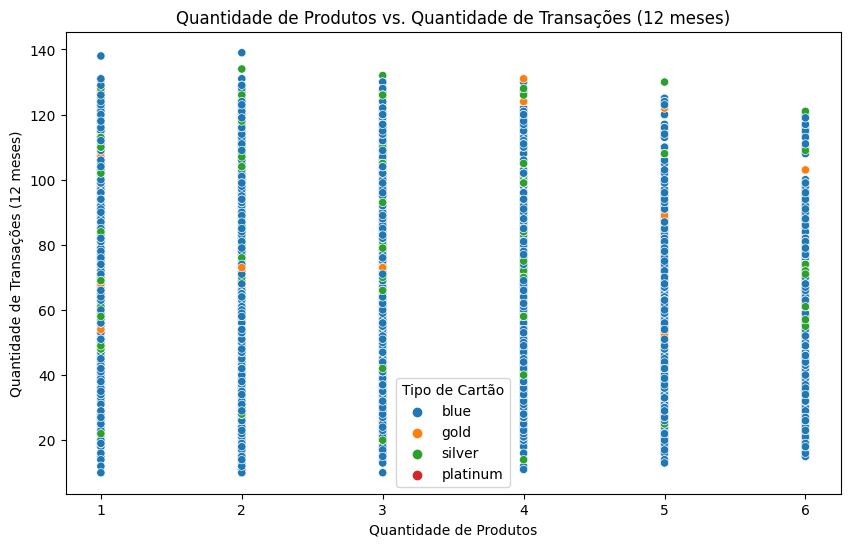

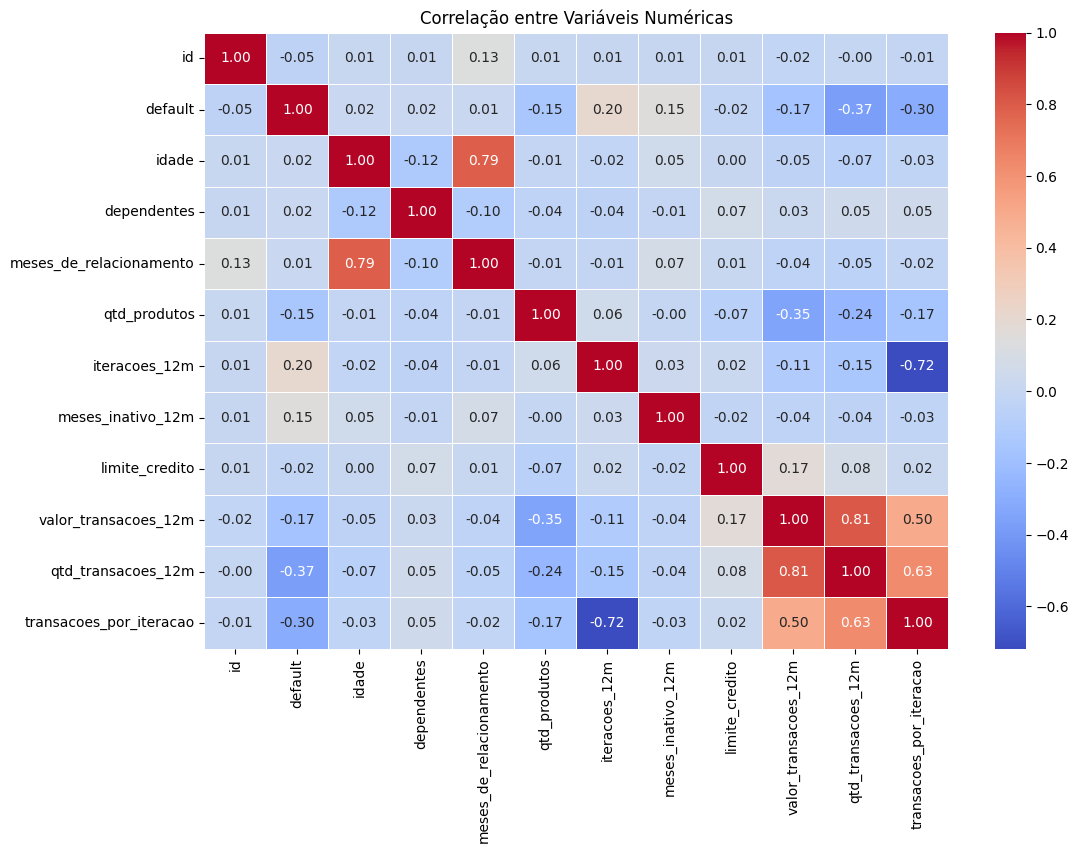

Dados limpos e manipulados salvos em: /kaggle/working/dados_limpos.csv


In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Verificar se o arquivo está no diretório correto
input_directory = '/kaggle/input/projeto-python-curso-cientista-de-dados-ebac/'
print("Arquivos disponíveis no diretório:", os.listdir(input_directory))

# Caminho do arquivo CSV (ajuste conforme necessário)
data_path = input_directory + 'Python_M10_support material.csv'  # Ajuste o nome do arquivo corretamente

# Tentar carregar o CSV
try:
    df = pd.read_csv(data_path)
    print("Arquivo carregado com sucesso!")
except FileNotFoundError as e:
    print("Erro: Arquivo não encontrado.")
    print(e)
    exit()

# Explorar os dados
print("\nInformações gerais do dataset:")
print(df.info())
print("\nDescrição estatística do dataset:")
print(df.describe())
print("\nQuantidade de valores nulos por coluna:")
print(df.isnull().sum())

# Limpar os dados
# Converter colunas financeiras de string para float
def convert_to_float(value):
    try:
        return float(value.replace(".", "").replace(",", "."))
    except:
        return np.nan

# Ajuste os nomes das colunas conforme o nome correto do dataset
for col in ['limite_credito', 'valor_transacoes_12m']:
    if col in df.columns:
        df[col] = df[col].apply(convert_to_float)

# Substituir valores nulos pela média ou com forward fill
# Caso necessário, utilize a média para substituir valores nulos de colunas numéricas
df['limite_credito'].fillna(df['limite_credito'].mean(), inplace=True)
df['valor_transacoes_12m'].fillna(df['valor_transacoes_12m'].mean(), inplace=True)

# Manipular os dados
if 'qtd_transacoes_12m' in df.columns and 'iteracoes_12m' in df.columns:
    df['transacoes_por_iteracao'] = df['qtd_transacoes_12m'] / (df['iteracoes_12m'] + 1)

if 'idade' in df.columns:
    df['faixa_etaria'] = pd.cut(df['idade'], bins=[20, 30, 40, 50, 60, 80], 
                                labels=['20-30', '30-40', '40-50', '50-60', '60+'])

# Visualizações

# 1. Distribuição de idade
if 'idade' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['idade'], bins=20, kde=True, color='blue')
    plt.title('Distribuição de Idades')
    plt.xlabel('Idade')
    plt.ylabel('Frequência')
    plt.show()

# 2. Limite de crédito por faixa etária
if 'faixa_etaria' in df.columns and 'limite_credito' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='faixa_etaria', y='limite_credito', data=df)
    plt.title('Limite de Crédito por Faixa Etária')
    plt.xlabel('Faixa Etária')
    plt.ylabel('Limite de Crédito')
    plt.show()

# 3. Relação entre produtos e transações
if 'qtd_produtos' in df.columns and 'qtd_transacoes_12m' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='qtd_produtos', y='qtd_transacoes_12m', hue='tipo_cartao', data=df)
    plt.title('Quantidade de Produtos vs. Quantidade de Transações (12 meses)')
    plt.xlabel('Quantidade de Produtos')
    plt.ylabel('Quantidade de Transações (12 meses)')
    plt.legend(title='Tipo de Cartão')
    plt.show()

# 4. Heatmap de correlação entre as variáveis numéricas
# Selecionar apenas as colunas numéricas
numerical_df = df.select_dtypes(include=[np.number])

# Plotar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

# Exportar os dados manipulados (opcional)
output_path = '/kaggle/working/dados_limpos.csv'
df.to_csv(output_path, index=False)
print(f"Dados limpos e manipulados salvos em: {output_path}")
